# NOTEBOOK 2 - Phasor diagrams

#### A quick introduction to the phasor diagrams in the dq frame. 

Still a work in progress, if there is anything missing or you have some general feedback please contact Sjur Føyen at foyen.sjur@ntnu.no 

Outline of notebook:
- outline


Code implemented by; Varg Førland. Date; 29.01.2025

Last update; 29.01.2025

GitHub Copilot used for assistance in coding.

In [13]:
# IMPORTS. RUN FIRST!
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.patches import Arc
#more

## Example 2.1 - Phasor diagram
Note: All values are in dq. For more information on coordinates refer to notebook 1.

First, we write down all network data and calculate per unit values

In [14]:
# System data:
# Base data
Sb = 100 # MVA
Vb_lv = 10 # kV
Vb_hv = 245 # kV
Zb_hv = Vb_hv**2/Sb # Ohm


#Stiff network 
Vs_kV = 220 + 0j # kV < deg
Vs = Vs_kV / Vb_hv # pu
P_MW = 15 # MW delivered power to network 
P = P_MW / Sb # pu
pf = 0.9 # lagging power factor

#Transformer date
Xt =  0.1 # pu

#Generator data
H = 3.10 # s
Xd = 1.05 # pu
Xq = 0.66 # pu

#Line data
Length = 250 # km
X_perKm = 0.4 # ohm / km
X_line_ohm = Length*X_perKm # ohm
Xl = X_line_ohm / Zb_hv # pu

Next we calculate the values we do not have. In this case it is current, voltage at the generator bus Vg and generator exited voltage Eq

In [15]:
# Current calculation

#first we find the complex power delivered to the network
S_mag = P / pf  # pu Apparent power
Q = np.sqrt(S_mag**2 - P**2) # pu Reactive power
S = P + 1j*Q # pu Complex power
# The current is then 
I = np.conjugate(S) / Vs # pu

# Voltage calculation

# we find the terminal voltage from the voltage drop across the line and transformer
Vg = Vs + I*1j*(Xl + Xt) # pu

# and the internal voltage of the generator is then found by finding the angle through EQ for the q-axis (machowski Equation 3.64/3.66 (2nd/3rd edition))
EQ = Vg + I*1j*(Xq) # pu
# angles
delta = np.angle(EQ) # rad
phi = -np.arccos(pf) # rad
beta = delta + np.abs(phi) + np.angle(Vg)


# The d and q currents can then be found as
Id = np.abs(I)*np.sin(beta) * np.e**(1j*(delta-90)) # pu
Iq = np.abs(I)*np.cos(beta) * np.e**(1j*delta) # pu

# Eq is then 
Eq = Vg + Iq*1j*(Xq) + Id*1j*Xd # pu


diagram

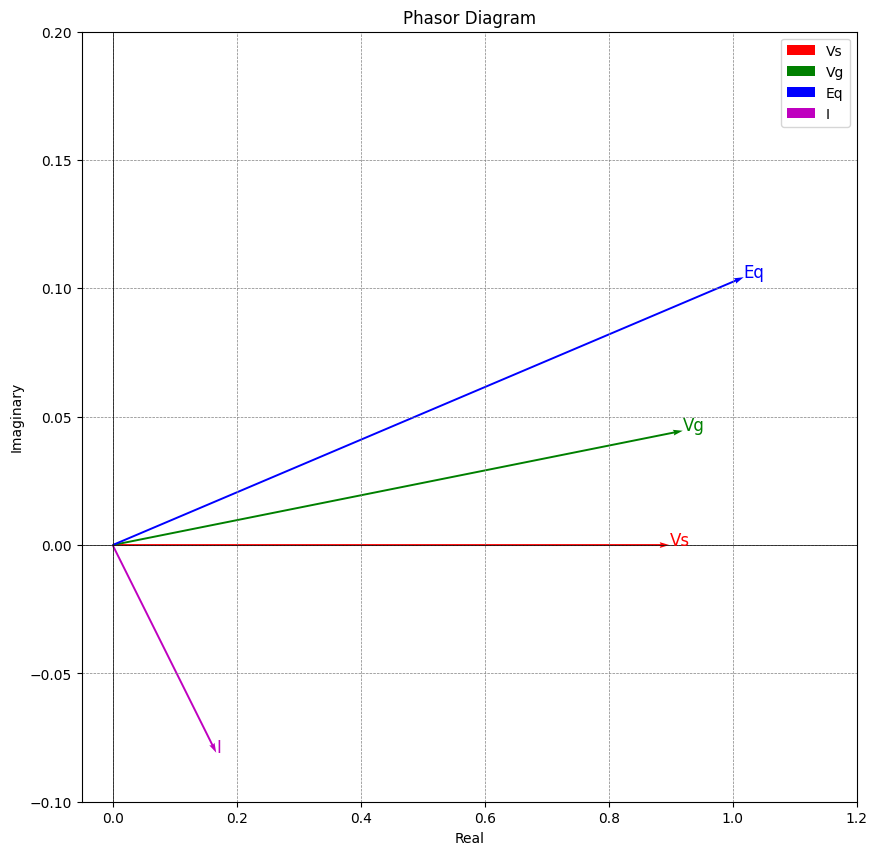

In [20]:
plt.figure(figsize=(10,10))

# Plot Vs
plt.quiver(0, 0, np.real(Vs), np.imag(Vs), angles='xy', scale_units='xy', scale=1, color='r', label='Vs', width=0.0025)

# Plot Vg
plt.quiver(0, 0, np.real(Vg), np.imag(Vg), angles='xy', scale_units='xy', scale=1, color='g', label='Vg', width=0.0025)

# Plot Eq
plt.quiver(0, 0, np.real(Eq), np.imag(Eq), angles='xy', scale_units='xy', scale=1, color='b', label='Eq', width=0.0025)

# Plot I
plt.quiver(0, 0, np.real(I), np.imag(I), angles='xy', scale_units='xy', scale=1, color='m', label='I', width=0.0025)

# Add labels and legend
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-0.05, 1.2)
plt.ylim(-.1, .2)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Phasor Diagram')
# Annotate vectors
plt.text(np.real(Vs), np.imag(Vs), 'Vs', color='r', fontsize=12)
plt.text(np.real(Vg), np.imag(Vg), 'Vg', color='g', fontsize=12)
plt.text(np.real(Eq), np.imag(Eq), 'Eq', color='b', fontsize=12)
plt.text(np.real(I), np.imag(I), 'I', color='m', fontsize=12)
plt.show()